In [1]:
import accelerator_environments
import gym
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import DDPG

In [2]:
env = gym.make("ARESExperimentalArea-Ocelot-v0")

initializing ocelot...
import: module PYFFTW is not installed. Install it to speed up calculation


In [3]:
model = DDPG("CnnPolicy", env, buffer_size=500000, verbose=2)
model.learn(total_timesteps=200, log_interval=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 5.51e+03 |
| time/              |          |
|    episodes        | 1        |
|    fps             | 0        |
|    time_elapsed    | 47       |
|    total timesteps | 25       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 1.52e+03 |
| time/              |          |
|    episodes        | 2        |
|    fps             | 0        |
|    time_elapsed    | 94       |
|    total timesteps | 50       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 1.63e+03 |
| time/              |          |
|    episodes 

In [4]:
model.save("model_halbdumm")

In [5]:
model.load("model_halbdumm")

In [6]:
# env=gym.wrappers.Monitor(env,"recordings",force=True, video_callable=lambda _: True)
env=env.env

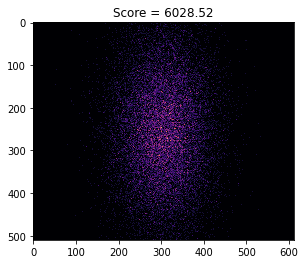

In [6]:
observation = env.reset()
plt.imshow(env.observation, cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.observation):.2f}")
plt.show()

In [7]:
observation = env.reset()
i = 0
actions, observations = [], []
for _ in range(10):
    print(f"\rStep {i}", end="")
    observations.append(observation)
    action, _state = model.predict(observation, deterministic=True)
    print(f" -> {action}", end="")
    actions.append(action)
    observation, reward, done, info = env.step(action)
    print(f" -> r:{reward:.2f} score:{env.score:.2f}")
    i += 1
#     if reward == 0:
#         break
observations = np.array(observations)
actions = np.array(actions)

Step 0 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99
Step 1 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99
Step 2 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99
Step 3 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99
Step 4 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99
Step 5 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99
Step 6 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99
Step 7 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99
Step 8 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99
Step 9 -> [ 15.  15. -15. -10.  10.] -> r:0.00 score:1512.99


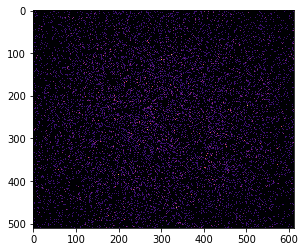

In [8]:
plt.imshow(observations[2], cmap="magma", interpolation="None")
plt.show()

No handles with labels found to put in legend.


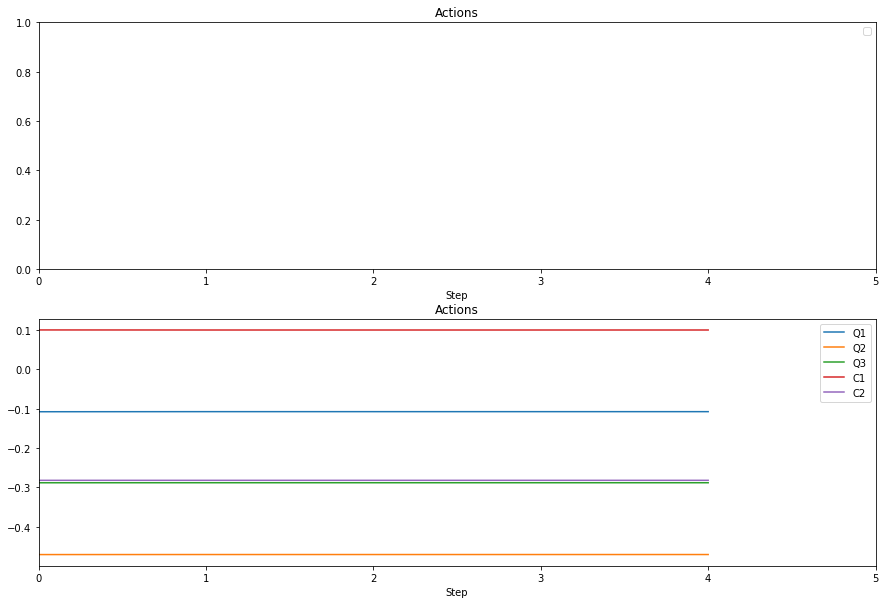

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("Actions")
plt.xlabel("Step")
plt.xlim(0,5)
# plt.plot(actions[:,0], label="x")
# plt.plot(actions[:,1], label="y")
# plt.plot(actions[:,2], label="w")
# plt.plot(actions[:,3], label="h")
plt.legend()
plt.subplot(212)
plt.title("Actions")
plt.xlabel("Step")
plt.xlim(0,5)
plt.plot(actions[:,0], label="Q1")
plt.plot(actions[:,1], label="Q2")
plt.plot(actions[:,2], label="Q3")
plt.plot(actions[:,3], label="C1")
plt.plot(actions[:,4], label="C2")
plt.legend()
plt.show()

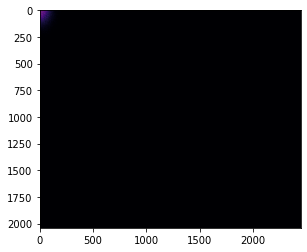

In [7]:
plt.imshow(env.screen_data, cmap="magma")
plt.show()